# kNN基础
#### 思想简单，应用数学知识少，效果好，可以解释机器学习算法使用过程中的很多细节问题。

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x1 = np.random.normal(50,6,10)
x1

array([42.48132431, 53.49407197, 45.8494149 , 46.00393994, 53.47615045,
       54.94134   , 50.93246162, 57.77594758, 42.40088275, 47.70410918])

In [4]:
x2 = np.random.normal(30,6,10)
x2

array([33.02704954, 27.9444391 , 25.87726861, 37.08031903, 30.11482033,
       25.38937418, 34.46997883, 31.33178384, 29.72187197, 25.27058888])

In [7]:
x1 = x1.reshape(5,-1)
x1

array([[42.48132431, 53.49407197],
       [45.8494149 , 46.00393994],
       [53.47615045, 54.94134   ],
       [50.93246162, 57.77594758],
       [42.40088275, 47.70410918]])

In [8]:
x2 = x2.reshape(5,-1)
x2

array([[33.02704954, 27.9444391 ],
       [25.87726861, 37.08031903],
       [30.11482033, 25.38937418],
       [34.46997883, 31.33178384],
       [29.72187197, 25.27058888]])

In [15]:
raw_data_x = np.concatenate([x1,x2])
raw_data_x

array([[42.48132431, 53.49407197],
       [45.8494149 , 46.00393994],
       [53.47615045, 54.94134   ],
       [50.93246162, 57.77594758],
       [42.40088275, 47.70410918],
       [33.02704954, 27.9444391 ],
       [25.87726861, 37.08031903],
       [30.11482033, 25.38937418],
       [34.46997883, 31.33178384],
       [29.72187197, 25.27058888]])

In [11]:
raw_data_y = [0,0,0,0,0,1,1,1,1,1]

In [16]:
x_train = np.array(raw_data_x)
y_train = np.array(raw_data_y)

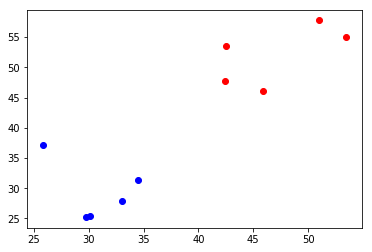

In [17]:
plt.scatter(x_train[y_train == 0,0],x_train[y_train ==0,1],color = "r")
plt.scatter(x_train[y_train == 1,0],x_train[y_train ==1,1],color = "b")

In [18]:
x = np.array([30.554891,35.546849])

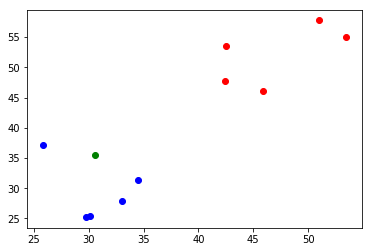

In [19]:
plt.scatter(x_train[y_train == 0,0],x_train[y_train ==0,1],color = "r")
plt.scatter(x_train[y_train == 1,0],x_train[y_train ==1,1],color = "b")
plt.scatter(x[0],x[1],color = "g")

In [22]:
from math import sqrt

In [25]:
distance = []
for X_train in x_train:
    d = sqrt(np.sum((x-X_train)**2))
    distance.append(d)
distance

[21.548610715267433,
 18.527633746519047,
 30.025496101864725,
 30.15589839341428,
 16.97428925288798,
 7.994260705230901,
 4.922568597774279,
 10.167003341876859,
 5.7527981913580035,
 10.309968126554464]

In [28]:
np.argsort(distance)

array([6, 8, 5, 7, 9, 4, 1, 0, 2, 3], dtype=int64)

In [32]:
nearest = np.argsort(distance)
nearest

array([6, 8, 5, 7, 9, 4, 1, 0, 2, 3], dtype=int64)

In [30]:
k = 6

In [31]:
topK_y = [y_train[i] for i in nearest[:k]]
topK_y

[1, 1, 1, 1, 1, 0]

In [34]:
from collections import Counter
Counter(topK_y)

Counter({0: 1, 1: 5})

In [35]:
votes = Counter(topK_y)

In [37]:
votes.most_common(1)

[(1, 5)]

In [38]:
y_predict = votes.most_common(1)[0][0]

In [39]:
y_predict

1

##  使用封装函数

In [40]:
%run kNN.py

In [41]:
kNN_classify(6,x_train,y_train,x)

1

## 使用scikit-learn中的kNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
kNN_classifier = KNeighborsClassifier(n_neighbors = 6)

In [44]:
kNN_classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [46]:
x = x.reshape(1,-1)

In [47]:
kNN_classifier.predict(x)

array([1])

In [48]:
y_predict = kNN_classifier.predict(x)
y_predict

array([1])

## 重新整理我们的kNN代码